# **机器学习（sklearn应用）笔记**
教程链接：
- [b 站教程 - 黑马程序员](https://www.bilibili.com/video/BV1nt411r7tj/?p=1&vd_source=6da3a9dd9cab36e4951447ee27dd58bb) ：参考如何使用 sklearn
- [SHOMMEAI 教程](https://www.showmeai.tech/tutorials/34?articleId=184)：参考机器学习概念的阐述和算法的详解

## **特征工程**
### **sklearn 数据集**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 获取鸢尾花数据集
iris = load_iris()

# 划分数据集 （训练集特征值，测试集特征值，训练集目标值，测试集目标值）
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                    random_state=22)

### **特征抽取**
#### **字典特征提取**
value 为非数值类型（类别，如下面例子中的 city）时，采用独热编码（一个city变成三个特征）：

In [2]:
from sklearn.feature_extraction import DictVectorizer

# 初始化数据
data = [{'city': '北京', 'temperature': 100},
        {'city': '上海', 'temperature': 60},
        {'city': '深圳', 'temperature': 30}]

# 设置转换器，设置返回值格式不是稀疏矩阵
transfer = DictVectorizer(sparse=False)

# 转换数据
new_data = transfer.fit_transform(data)

print('特征数据:')
new_data

特征数据:


array([[  0.,   1.,   0., 100.],
       [  1.,   0.,   0.,  60.],
       [  0.,   0.,   1.,  30.]])

In [3]:
print('特征的名字:')
transfer.get_feature_names_out()  # 旧版本是 get_feature_names

特征的名字:


array(['city=上海', 'city=北京', 'city=深圳', 'temperature'], dtype=object)

#### **文本特征提取**
##### **方法1 CountVectorizer**
统计每个样本**特征词**出现的个数（这里单词作为特征词）

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

data = ["life is short,i like like python",
        "life is too long,i dislike python"]

# 实例化转换器类
transfer = CountVectorizer(stop_words=['is', 'too'])  # stop_words 指定停用词

# 转换数据
new_data = transfer.fit_transform(data)

# 输出部分：（由于 CountVectorizer构造方法没有 sparse 参数，可调用 toarray 方法转化成普通矩阵）
print('特征数据:')
new_data.toarray()

特征数据:


array([[0, 1, 2, 0, 1, 1],
       [1, 1, 0, 1, 1, 0]], dtype=int64)

In [5]:
print('特征的名字:')
transfer.get_feature_names_out()  # 旧版本是 get_feature_names

特征的名字:


array(['dislike', 'life', 'like', 'long', 'python', 'short'], dtype=object)

**中文情况**  
特别的，对于**中文**来说，要预先进行**分词**（空格隔开）。  
不分词的情况如下：

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

data = ['这是一条中文的句子', '这也是一条中文的句子']
transfer = CountVectorizer()
new_data = transfer.fit_transform(data)

print('特征数据:')
new_data.toarray()

特征数据:


array([[0, 1],
       [1, 0]], dtype=int64)

In [7]:
print('特征的名字:')
transfer.get_feature_names_out()  # 旧版本是 get_feature_names

特征的名字:


array(['这也是一条中文的句子', '这是一条中文的句子'], dtype=object)

使用 jieba 库对中文分词

In [8]:
import jieba

data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
        "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
        "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]

# print(' '.join(list(jieba.cut(data[0]))))
text_list = []
for sentence in data:
    text_list.append(
        ' '.join(list(jieba.cut(sentence)))
    )
text_list

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wanqi\AppData\Local\Temp\jieba.cache
Loading model cost 0.680 seconds.
Prefix dict has been built successfully.


['一种 还是 一种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。',
 '我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。',
 '如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']

分完词后，后续步骤相同
##### **方法2 TfidfVectorizer**
思想：某个词或短语在一篇文章中出现的概率高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。
公式：
- 词频（term frequency，tf）指的是某一个给定的词语在该文件中出现的频率
- 逆向文档频率（inverse document frequency，idf）是一个词语普遍重要性的度量。某一特定词语的idf，可以由总文件数目除以包含该词语之文件的数目，再将得到的商取以10为底的对数得到
$$tfidf = tf * idf$$

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = ["life is short,i like like python",
        "life is too long,i dislike python"]

# 实例化转换器类
transfer = TfidfVectorizer(stop_words=['is', 'too'])  # stop_words 指定停用词

# 转换数据
new_data = transfer.fit_transform(data)

# 输出部分：
print('特征数据:')
new_data.toarray()

特征数据:


array([[0.        , 0.29017021, 0.81564821, 0.        , 0.29017021,
        0.4078241 ],
       [0.57615236, 0.40993715, 0.        , 0.57615236, 0.40993715,
        0.        ]])

In [10]:
print('特征的名字:')
transfer.get_feature_names_out()

特征的名字:


array(['dislike', 'life', 'like', 'long', 'python', 'short'], dtype=object)

### **特征预处理**
使用归一化/标准化：特征的单位或者大小相差较大，或者某特征的方差相比其他的特征要大出几个数量级，容易影响（支配）目标结果，使得一些算法无法学习到其它的特征
#### **方法1 归一化**
公式：
$$X' = \frac{X - min}{max - min}, X'' = X' * (mx - mi) + mi$$
> 作用于每一列（每个特征），max为一列的最大值，min为一列的最小值。  
X''为最终结果，mx，mi分别为要映射到的区间值。默认mx为1,mi为0

例子

In [11]:
# 从文件读取特征数据
import pandas as pd

data = pd.read_csv('./machine learning resources/preprocessing.csv')
data = data.iloc[:, :3]  # 或 data[['milage','Liters','Consumtime']]
data

,milage,Liters,Consumtime
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296


In [12]:
# 读取完特征数据后，开始特征预处理
from sklearn.preprocessing import MinMaxScaler

transfer = MinMaxScaler(feature_range=(1, 10))
new_data = transfer.fit_transform(data)
print('特征数据:')
new_data

特征数据:


array([[ 4.92243767,  6.2937357 ,  5.79141704],
       [ 1.        ,  5.39146393, 10.        ],
       [ 2.71606648,  1.        ,  4.92142156],
       [10.        , 10.        ,  2.72252417],
       [ 4.5401662 ,  1.17523805,  1.        ]])

In [13]:
print('特征的名字:')
transfer.get_feature_names_out()

特征的名字:


array(['milage', 'Liters', 'Consumtime'], dtype=object)

特点：很容易收最大值最小值影响，鲁棒性差，只适合传统精确小数据场景

#### **方法2 标准化**
公式：
$$X' = \frac{x - mean}{\sigma}$$


In [14]:
# data 用上面归一化处理前得到的 data
from sklearn.preprocessing import StandardScaler

transfer = StandardScaler()
new_data = transfer.fit_transform(data)
print('特征数据:')
new_data

特征数据:


array([[ 0.0947602 ,  0.44990013,  0.29573441],
       [-1.20166916,  0.18312874,  1.67200507],
       [-0.63448132, -1.11527928,  0.01123265],
       [ 1.77297701,  1.54571769, -0.70784025],
       [-0.03158673, -1.06346729, -1.27113187]])

In [15]:
print('特征的名字:')
transfer.get_feature_names_out()

特征的名字:


array(['milage', 'Liters', 'Consumtime'], dtype=object)

### **特征降维**
降低特征个数，得到一组不相关的主变量（要求特征不相关）
> 相关特征：如相对湿度和降雨量

降维的两种方式：特征选择、主成分分析
#### **特征选择**
Filter（过滤式）：主要探究特征本身特点、特征与特征和目标值之间关联
- 方差选择法：低方差特征过滤
- 相关系数

Embedded （嵌入式）：算法自动选择特征（特征与目标值之间的关联）
- 决策树：信息熵、信息增益
- 正则化：L1、L2
- 深度学习：卷积等

##### **过滤式**
**低方差特征过滤**

In [16]:
# 读取数据
import pandas as pd

data = pd.read_csv('machine learning resources/variance.csv')
data = data.iloc[:, 1:-2]  # 所有行，第1列和最后三列不要
print('特征数:', data.shape[1])
data

特征数: 10


,pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense,date
0,5.8753,5.9572,1.1818,8.525255e+10,0.8008,14.9403,1.211445e+12,2.010,2.070140e+10,1.088254e+10
1,7.0560,7.0289,1.5880,8.411336e+10,1.6463,7.8656,3.002521e+11,0.326,2.930837e+10,2.378348e+10
2,-262.7461,-262.7461,7.0003,5.170455e+08,-0.5678,-0.5943,7.705178e+08,-0.006,1.167983e+07,1.203008e+07
3,16.4761,16.4760,3.7146,1.968046e+10,5.6036,14.6170,2.800916e+10,0.350,9.189387e+09,7.935543e+09
4,12.5877,12.5878,2.5616,4.172721e+10,2.8729,10.9097,8.124738e+10,0.271,8.951453e+09,7.091398e+09


In [17]:
from sklearn.feature_selection import VarianceThreshold

# variance: 方差, threshold: 阈值
transfer = VarianceThreshold(threshold=10)  # 方差阈值为 1
new_data = transfer.fit_transform(data)
print('特征数:', new_data.shape[1])
new_data

特征数: 7


array([[ 5.87530000e+00,  5.95720000e+00,  8.52525509e+10,
         1.49403000e+01,  1.21144486e+12,  2.07014010e+10,
         1.08825400e+10],
       [ 7.05600000e+00,  7.02890000e+00,  8.41133582e+10,
         7.86560000e+00,  3.00252062e+11,  2.93083692e+10,
         2.37834769e+10],
       [-2.62746100e+02, -2.62746100e+02,  5.17045520e+08,
        -5.94300000e-01,  7.70517753e+08,  1.16798290e+07,
         1.20300800e+07],
       [ 1.64761000e+01,  1.64760000e+01,  1.96804560e+10,
         1.46170000e+01,  2.80091592e+10,  9.18938688e+09,
         7.93554273e+09],
       [ 1.25877000e+01,  1.25878000e+01,  4.17272149e+10,
         1.09097000e+01,  8.12473804e+10,  8.95145349e+09,
         7.09139799e+09]])

**相关系数**
检查相关性：求相关系数或画图
相关系数大那些特征处理方法：
- 选择其中一个
- 求他们的加权平均数（转化成新的特征）
- 主成分分析法：自动解决这个问题

In [18]:
# 求相关系数
from scipy.stats import pearsonr  # 皮尔逊相关系数

r = pearsonr(data['pe_ratio'], data['pb_ratio'])
r

PearsonRResult(statistic=0.9999999438318399, pvalue=1.5979719472514354e-11)

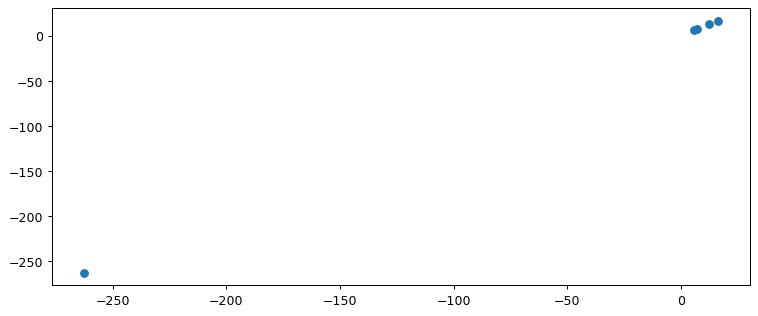

In [19]:
# 画图
import matplotlib.pyplot as plt

# %matplotlib inline

plt.figure(figsize=(10, 4), dpi=90)
plt.scatter(data['pe_ratio'], data['pb_ratio'])

#### **主成分分析**
- 定义：高维数据转化为低维数据的过程，在此过程中可能会舍弃原有数据、创造新的变量
- 作用：是数据维数压缩，尽可能降低原数据的维数（复杂度），损失少量信息。
- 应用：回归分析或者聚类分析当中

In [20]:
from sklearn.decomposition import PCA

data = [[2, 8, 4, 5],
        [6, 3, 0, 8],
        [5, 4, 9, 1]]
transfer = PCA(n_components=2)
"""
n_components:
  - 小数：表示保留百分之多少的信息
  - 整数：减少到多少特征
"""
new_data = transfer.fit_transform(data)
new_data

array([[ 1.28620952e-15,  3.82970843e+00],
       [ 5.74456265e+00, -1.91485422e+00],
       [-5.74456265e+00, -1.91485422e+00]])

## **分类算法**
### **sklearn 转换器与估计器**
转换器：特征工程的父类
- `fit()`: 求得训练集X的均值，方差，最大值，最小值
- `transform()`: 在fit的基础上，进行标准化，降维，归一化等操作
- `fit_transform()`: fit_transform是fit和transform的组合，既包括了训练又包含了转换

<img src="./machine learning resources/transformer.png" style="zoom: 40%;">

估计器：用来实现 sklearn 机器学习算法，是一类实现了算法的 API
- `estimator.fit(x_train, y_train)`: 计算；调用完毕后模型生成
- 模型评估（在测试集上）：
  - `predict()`: 求出预测值  `y_predict = estimator.predict(x_test)`, 比较 y_predict 与 y_test
  - `score()`: 计算准确率  `accuracy = estimator.score(x_test, y_test)`

<img src="./machine learning resources/estimator.png" style="zoom: 50%;">


### **K-近邻算法（KNN）**
- 定义
  - 如果一个样本在特征空间中的**k个最相似**(即特征空间中最邻近，距离最短)的样本中的大多数属于某一个类别，则该样本也属于这个类别。
  - k 值取得过小：容易受异常值干扰
  - k 值取得过大：容易受样本不均匀影响
- 距离
  - 欧氏距离（平方根）、曼哈顿距离（绝对值和）、明可夫斯基距离

例子：用 KNN 算法对鸢尾花分类

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 获取数据
iris = load_iris()

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=6)

# 特征工程：标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)  # !!!测试集用训练集的均值和标准差处理

# KNN 算法预估器
"""
下面 p 和 metric 取的都是默认值，可以省略；
p = 2, metric = 'minkowski' => 欧氏距离
p = 1, metric = 'minkowski' => 曼哈顿距离
"""
estimator = KNeighborsClassifier(n_neighbors=3, p=2, metric="minkowski")  # k = 3
estimator.fit(x_train, y_train)

# 模型评估
## 方法 1：直接比对真实值和预测值
print("y_predict:")
y_predict = estimator.predict(x_test)
y_predict

y_predict:


array([0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 1, 2, 0, 1])

In [22]:
print("y_test:")
y_test

y_test:


array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1])

In [23]:
y_predict == y_test  # numpy.array 的比较

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True])

In [24]:
## 方法 2：计算准确率
print("准确率:")
estimator.score(x_test, y_test)

准确率:


0.9

KNN 算法总结：
- 优点：
  - 简单，易于理解，易于实现，无需训练
- 缺点：
  - 懒惰算法，对测试样本分类时的计算量大，内存开销大
  - 必须指定K值，K值选择不当则分类精度不能保证

### **模型选择与调优**
#### **交叉验证**
补：[训练集 验证集 测试集](https://zhuanlan.zhihu.com/p/48976706)
四折交叉验证例：

<img src="./machine learning resources/cross-validation.png" style="zoom: 35%;">

#### **超参数搜索-网格搜索(Grid Search)**
超参数：需要手动指定的（如k-近邻算法中的K值）  
网格搜索：对模型预设几种超参数组合，每组超参数都采用交叉验证来进行评估，最后选出最优参数组合建立模型。

例子：用 KNN 算法对鸢尾花分类，添加网格搜索和交叉验证

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV  # CV: Cross Validation

# 获取数据
iris = load_iris()

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=6)

# 特征工程：标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)  # !!!测试集用训练集的均值和标准差处理

# KNN 算法预估器
estimator = KNeighborsClassifier(n_neighbors=3, p=2, metric="minkowski")  # k = 3

"""加入网格搜索与交叉验证"""
param_dict = {"n_neighbors": list(range(4, 8))}  # 要传入的超参数，以字典形式传入
estimator = GridSearchCV(estimator=estimator, param_grid=param_dict, cv=10)  # 10 折交叉验证
estimator.fit(x_train, y_train)

# 模型评估
## 方法 1：直接比对真实值和预测值
print("y_predict:")
y_predict = estimator.predict(x_test)
y_predict

y_predict:


array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1])

In [26]:
print("y_test:")
y_test

y_test:


array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1])

In [27]:
y_predict == y_test  # numpy.array 的比较

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [28]:
## 方法 2：计算准确率
print("准确率（在测试集中的效果）:")
estimator.score(x_test, y_test)

准确率（在测试集中的效果）:


0.9666666666666667

In [29]:
"""训练验证集的结果"""
# 最佳参数
print("最佳参数:")
estimator.best_params_

最佳参数:


{'n_neighbors': 6}

In [30]:
# 最佳结果
print("最佳结果（在验证集中的结果）:")
estimator.best_score_

最佳结果（在验证集中的结果）:


0.9666666666666666

In [31]:
# 最佳估计器
print("最佳估计器:")
estimator.best_estimator_

最佳估计器:


KNeighborsClassifier(n_neighbors=6)

In [32]:
# 交叉验证结果
print("交叉验证结果:")
estimator.cv_results_

交叉验证结果:


{'mean_fit_time': array([0.        , 0.00080016, 0.        , 0.00160074]),
 'std_fit_time': array([0.        , 0.00240047, 0.        , 0.00320149]),
 'mean_score_time': array([0.00160096, 0.00079932, 0.00159943, 0.        ]),
 'std_score_time': array([0.00320191, 0.00239797, 0.00319886, 0.        ]),
 'param_n_neighbors': masked_array(data=[4, 5, 6, 7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7}],
 'split0_test_score': array([0.91666667, 0.91666667, 0.91666667, 0.91666667]),
 'split1_test_score': array([1., 1., 1., 1.]),
 'split2_test_score': array([0.91666667, 0.91666667, 1.        , 0.91666667]),
 'split3_test_score': array([1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1.]),
 'split5_test_score': array([1., 1., 1., 1.]),
 'split6_test_score': array([1., 1., 1., 1.]),
 'split7_test_score': array([0.91666667, 0.91666667

**案例：Facebook签到位置预测K值调优**  
流程分析：
1. 获取数据
2. 数据处理
   1. 缩小数据范围（仅为了演示），如：设置 2 < x < 2.5, 1 < y < 1.5
   2. time：时间戳 => 年月日时分秒
   3. 过滤签到次数少的地点
   4. 数据集划分
3. 特征工程：标准化
4. KNN 算法预估流程
5. 模型选择与调优
6. 模型评估

In [33]:
import pandas as pd

# 1、获取数据     注：该数据量很大，故单独放在一个 cell 中！！！！！！
data = pd.read_csv('./官方资料/day2/02-代码/FBlocation/train.csv')

In [34]:
data.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [35]:
# 2、数据处理
# 1) 缩小数据范围
data = data.query("x < 2.5 & x > 2 & y < 1.5 & y > 1")

In [36]:
# 2) 处理 time
time_value = pd.to_datetime(data['time'], unit='s')
# time_value.values
date = pd.DatetimeIndex(time_value)
# 添加特征 day, weekday, hour
data['day'] = date.day
data['weekday'] = date.weekday
data['hour'] = date.hour

data.head()

,row_id,x,y,accuracy,time,place_id,day,weekday,hour
112,112,2.2360,1.3655,66,623174,7663031065,8,3,5
180,180,2.2003,1.2541,65,610195,2358558474,8,3,1
367,367,2.4108,1.3213,74,579667,6644108708,7,2,17
874,874,2.0822,1.1973,320,143566,3229876087,2,4,15
1022,1022,2.0160,1.1659,65,207993,3244363975,3,5,9


In [37]:
# 3) 过滤签到次数少的点
place_count = data.groupby('place_id').count()['row_id']
place_count  # 每个地点签到次数

place_id
1012165853     1
1013991737     3
1014605271    28
1015645743     4
1017236154    31
              ..
9988815170     1
9992113332     1
9993074125     2
9994257798    25
9996671132    18
Name: row_id, Length: 2514, dtype: int64

In [38]:
# 选取签到次数大于 3 的地点
place_count[place_count > 3]

place_id
1014605271     28
1015645743      4
1017236154     31
1024951487      5
1028119817      4
             ... 
9936666116    140
9954155328      8
9980625005     16
9994257798     25
9996671132     18
Name: row_id, Length: 950, dtype: int64

In [39]:
# 根据这个条件筛选出 data
data_final = data[data['place_id'].isin(place_count[place_count > 3].index.values)]
data_final

,row_id,x,y,accuracy,time,place_id,day,weekday,hour
112,112,2.2360,1.3655,66,623174,7663031065,8,3,5
367,367,2.4108,1.3213,74,579667,6644108708,7,2,17
874,874,2.0822,1.1973,320,143566,3229876087,2,4,15
1022,1022,2.0160,1.1659,65,207993,3244363975,3,5,9
1045,1045,2.3859,1.1660,498,503378,6438240873,6,1,19
...,...,...,...,...,...,...,...,...,...
29115112,29115112,2.1889,1.2914,168,721885,4606837364,9,4,8
29115204,29115204,2.1193,1.4692,58,563389,2074133146,7,2,12
29115338,29115338,2.0007,1.4852,25,765986,6691588909,9,4,20
29115464,29115464,2.4132,1.4237,61,151918,7396159924,2,4,18


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 筛选特征值和目标值
x = data_final[['x', 'y', 'accuracy', 'day', 'weekday', 'hour']]  # 特征值
y = data_final['place_id']

# 4) 数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 3、特征工程：标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 4、KNN 算法预估器
estimator = KNeighborsClassifier()

# 加入网格搜索与交叉验证
param_dict = {'n_neighbors': list(range(3, 9))}
estimator = GridSearchCV(estimator=estimator, param_grid=param_dict, cv=10)  # 10 折交叉验证
estimator.fit(x_train, y_train)

# 模型评估
## 方法 1：直接比对真实值和预测值
print("y_predict:")
y_predict = estimator.predict(x_test)
y_predict

c:\Users\wanqi\anaconda3\envs\tensorflow-py38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


y_predict:


array([6828787147, 1779583116, 4336717042, ..., 1732563460, 3239554580,
       2585551753], dtype=int64)

In [41]:
print("y_test:")
y_test.values

y_test:


array([6828787147, 5675044797, 4684865650, ..., 1935182397, 3239554580,
       2585551753], dtype=int64)

In [42]:
y_predict == y_test.values  # numpy.array 的比较

array([ True, False, False, ..., False,  True,  True])

In [43]:
## 方法 2：计算准确率
print("准确率（在测试集中的效果）:")
estimator.score(x_test, y_test)

准确率（在测试集中的效果）:


0.3783215918922259

In [44]:
"""训练验证集的结果"""
# 最佳参数
print("最佳参数:")
estimator.best_params_

最佳参数:


{'n_neighbors': 6}

In [45]:
# 最佳结果
print("最佳结果（在验证集中的结果）:")
estimator.best_score_

最佳结果（在验证集中的结果）:


0.36259428009128725

In [46]:
# 最佳估计器
print("最佳估计器:")
estimator.best_estimator_

最佳估计器:


KNeighborsClassifier(n_neighbors=6)

In [47]:
# 交叉验证结果
print("交叉验证结果:")
estimator.cv_results_

交叉验证结果:


{'mean_fit_time': array([0.11299653, 0.11165721, 0.110097  , 0.11526117, 0.11005497,
        0.10906315]),
 'std_fit_time': array([0.00834388, 0.00656163, 0.0043161 , 0.0059273 , 0.00344891,
        0.00309492]),
 'mean_score_time': array([0.26931493, 0.27967167, 0.27841699, 0.30087686, 0.29563262,
        0.29899375]),
 'std_score_time': array([0.0241291 , 0.01329785, 0.00955866, 0.02320587, 0.01975683,
        0.01048642]),
 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8}],
 'split0_test_score': array([0.34358103, 0.35393172, 0.36011123, 0.35980226, 0.35902982,
        0.35594006]),
 'split1_test_score': array([0.35145991, 0.36011123, 0.36412792, 0.36026572, 0.35825738,
        0.35856635]),
 'split2_test_score': array([0

> ***注：下面的笔记均略去知识点的罗列，只记录相应 sklearn 代码***

### **朴素贝叶斯算法**
朴素：假定特征之间相互独立  
链接：[SHOWMEAI-朴素贝叶斯算法详解](https://www.showmeai.tech/tutorials/34?articleId=189)  
**案例：20类新闻分类**

In [48]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# 获取数据
news = fetch_20newsgroups(subset='all')  # data_home=None(默认), subset: {'train', 'test', 'all'}

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=1)

# 特征工程
transfer = TfidfVectorizer()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 朴素贝叶斯算法预估器
estimator = MultinomialNB()  # 默认：拉普拉斯平滑系数 alpha=1.0
estimator.fit(x_train, y_train)

# 模型评估（测试集）
## 直接比对真实值和预测值
print('---测试集结果---')
y_predict = estimator.predict(x_test)
print('y_predict:')
y_predict

---测试集结果---
y_predict:


array([16, 19, 18, ..., 17, 16,  2])

In [49]:
print('y_test:')
y_test

y_test:


array([16, 19, 18, ..., 17, 16,  2])

In [50]:
print('直接比对真实值和预测值:')
y_predict == y_test

直接比对真实值和预测值:


array([ True,  True,  True, ...,  True,  True,  True])

In [51]:
## 计算准确率
print('测试集准确率：')
estimator.score(x_test, y_test)

测试集准确率：


0.8647214854111406

### **决策树**  
链接：[SHOWMEAI 决策树模型详解](https://www.showmeai.tech/tutorials/34?articleId=190)  

一些概念：  
- 信息：消除不确定性的东西  
- 信息熵：消除不确定性**所需信息量**的度量

ID-3：
- 信息增益：选择某个属性进行划分时信息熵的变化（不确定性降低的程度，描述了一个特征带来的信息量的多少）
- 信息增益 = 划分前的信息熵 - 划分后的信息熵（消除不确定性所需信息量变小）

C4.5：
- 信息增益的问题：偏向取值较多的特征
- 信息增益率：多了一个衡量本身属性的分散程度的部分作为分母

CART:
- 基尼指数：从 D 中随机抽取两个样例，类别不一致的概率

预剪枝、后剪枝、连续值缺失值：参加上面链接

In [52]:
"""例子1：决策树对鸢尾花分类"""
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1、获取数据
iris = load_iris()

# 2、划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=22)

"""决策树不需要标准化（不计算距离）"""

# 3、决策树预估器
estimator = DecisionTreeClassifier(criterion='entropy')  # criterion 默认为 'gini'
estimator.fit(x_train, y_train)

# 4、模型评估
## 直接比对真实值和预测值
y_predict = estimator.predict(x_test)
print('y_predict:')
y_predict

y_predict:


array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1])

In [53]:
print('y_test:')
y_test

y_test:


array([0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 2])

In [54]:
print('直接比对真实值和预测值:')
y_predict == y_test

直接比对真实值和预测值:


array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [55]:
## 计算准确率
print('测试集准确率：')
estimator.score(x_test, y_test)

测试集准确率：


0.9

#### **决策树可视化**
[http://webgraphviz.com/](http://webgraphviz.com/)

In [56]:
from sklearn.tree import export_graphviz

# 生成 .dot 文件，在 http://webgraphviz.com/ 中查看
export_graphviz(estimator, out_file='./output/iris_tree.dot', feature_names=iris.feature_names)

可视化结果：
- entropy: 信息增益
- samples: 样本数  

<img src='./machine learning resources/iris_tree.png' style='zoom:60%;'>

In [57]:
"""例子2：决策树 泰坦尼克号乘客生存预测"""
# 数据集链接：https://hbiostat.org/data/repo/titanic.txt
#        或见 ./machine learning resources/titanic.txt
import pandas as pd

# 1 获取数据
path = './machine learning resources/titanic.txt'
titanic = pd.read_csv(path)
titanic.head(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


In [58]:
# 2 选取特征值和目标值
x = titanic[['pclass', 'age', 'room', 'sex']]
y = titanic['survived']

`fillna()` 中 inplace 参数的取值：True、False  
- True：直接修改原对象  
- False：创建一个副本，修改副本，原对象不变（缺省默认）

In [59]:
# 3 数据处理
# 1）缺失值处理，age、ticket 有缺失
x['age'].fillna(x['age'].mean(), inplace=True)
x['room'].fillna(method='ffill', inplace=True)

C:\Users\wanqi\AppData\Local\Temp\ipykernel_13428\1066978918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(x['age'].mean(), inplace=True)
C:\Users\wanqi\AppData\Local\Temp\ipykernel_13428\1066978918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['room'].fillna(method='ffill', inplace=True)


Dataframe.to_dict 中 orient 参数：
- orient =‘dict’，是函数默认的，转化后的字典形式：{column(列名) : {index(行名) : value(值) )}}；
- orient =‘list’ ，转化后的字典形式：{column(列名) :{[ values ] (值)}};
- orient =‘series’ ，转化后的字典形式：{column(列名) : Series (values) (值)};
- orient =‘split’ ，转化后的字典形式：{‘index’ : [index]，‘columns’ :[columns]，’data‘ : [values]};
- orient =‘records’ ，转化后是 list形式：[{column(列名) : value(值)}…{column:value}];
- orient =‘index’ ，转化后的字典形式：{index(值) : {column(列名) : value(值)}};

In [60]:
# 2）转换成字典
x = x.to_dict(orient='records')

In [61]:
x[:5]  # 显示前5条

[{'pclass': '1st', 'age': 29.0, 'room': 'B-5', 'sex': 'female'},
 {'pclass': '1st', 'age': 2.0, 'room': 'C26', 'sex': 'female'},
 {'pclass': '1st', 'age': 30.0, 'room': 'C26', 'sex': 'male'},
 {'pclass': '1st', 'age': 25.0, 'room': 'C26', 'sex': 'female'},
 {'pclass': '1st', 'age': 0.9167, 'room': 'C22', 'sex': 'male'}]

In [62]:
# 4 划分数据集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

In [63]:
# 5 字典特征抽取
from sklearn.feature_extraction import DictVectorizer

transfer = DictVectorizer()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [64]:
# 6 决策树预估器
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()  # 可调超参数：criterion，max_depth
param_dict = {'max_depth': list(range(5, 15))}
estimator = GridSearchCV(estimator=estimator, param_grid=param_dict, cv=10)
estimator.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

In [65]:
# 7 模型评估(测试集)
from sklearn.tree import export_graphviz

y_predict = estimator.predict(x_test)
print('y_predict:\n', y_predict)
print('y_test:\n', y_test.values)
print('直接比对真实值和预测值：\n', y_test.values == y_predict)

print('准确率为：\n', estimator.score(x_test, y_test))

y_predict:
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1]
y_test:
 [0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 0 0 

In [66]:
# 训练验证集的结果

print("最佳参数:")
estimator.best_params_

最佳参数:


{'max_depth': 6}

In [67]:
print('最佳估计器:')
estimator.best_estimator_

最佳估计器:


DecisionTreeClassifier(max_depth=6)

In [68]:
# 最佳结果
print("最佳结果（在验证集中的结果）:")
estimator.best_score_

最佳结果（在验证集中的结果）:


0.8353535353535353

In [69]:
# 交叉验证结果
print("交叉验证结果:")
estimator.cv_results_

交叉验证结果:


{'mean_fit_time': array([0.00319939, 0.00159812, 0.00240374, 0.00311089, 0.0040931 ,
        0.00254741, 0.00251307, 0.0016917 , 0.00400083, 0.00330758]),
 'std_fit_time': array([0.00391844, 0.00319624, 0.00367177, 0.00384043, 0.00410073,
        0.00373216, 0.00384979, 0.00338928, 0.00400083, 0.00384466]),
 'mean_score_time': array([2.39975452e-03, 1.60260201e-03, 1.59878731e-03, 9.02414322e-05,
        0.00000000e+00, 9.19914246e-04, 8.02087784e-04, 0.00000000e+00,
        0.00000000e+00, 7.98583031e-04]),
 'std_score_time': array([0.00366569, 0.00320522, 0.00319758, 0.00027072, 0.        ,
        0.00243146, 0.00240626, 0.        , 0.        , 0.00239575]),
 'param_max_depth': masked_array(data=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  

### **随机森林**
链接：[随机森林分类模型详解](https://www.showmeai.tech/tutorials/34?articleId=191)

In [70]:
# 沿用上面例子，直接使用 x_train, x_test, y_train, y_test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()

# 网格搜索与超参数调优
param_dict = {'n_estimators': list(range(100, 301, 100)),
              'max_depth': list(range(5, 15, 2))}
estimator = GridSearchCV(estimator=estimator, param_grid=param_dict, cv=5)
estimator.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13],
                         'n_estimators': [100, 200, 300]})

In [71]:
# 模型评估(测试集)
from sklearn.tree import export_graphviz

y_predict = estimator.predict(x_test)
print('y_predict:\n', y_predict)
print('y_test:\n', y_test.values)
print('直接比对真实值和预测值：\n', y_test.values == y_predict)

print('准确率为：\n', estimator.score(x_test, y_test))

y_predict:
 [0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1]
y_test:
 [0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 0 0 

In [72]:
# 训练验证集的结果

print("最佳参数:")
estimator.best_params_

最佳参数:


{'max_depth': 7, 'n_estimators': 300}

In [73]:
print('最佳估计器:')
estimator.best_estimator_

最佳估计器:


RandomForestClassifier(max_depth=7, n_estimators=300)

In [74]:
# 最佳结果
print("最佳结果（在验证集中的结果）:")
estimator.best_score_

最佳结果（在验证集中的结果）:


0.8384025691494873

In [75]:
# 交叉验证结果
print("交叉验证结果:")
estimator.cv_results_

交叉验证结果:


{'mean_fit_time': array([0.17350492, 0.34916682, 0.50433969, 0.18276906, 0.3792757 ,
        0.54112363, 0.19628248, 0.39323535, 0.61500173, 0.20731864,
        0.41713862, 0.67961211, 0.22459269, 0.46900668, 0.67799215]),
 'std_fit_time': array([0.00733668, 0.01734198, 0.00507057, 0.00687173, 0.02388183,
        0.00619284, 0.00413496, 0.00317509, 0.03248931, 0.00545687,
        0.00986875, 0.04178946, 0.00739534, 0.01749024, 0.01496615]),
 'mean_score_time': array([0.00973845, 0.01957116, 0.02941599, 0.01303   , 0.0181757 ,
        0.02804241, 0.01148024, 0.02003679, 0.02952237, 0.01127009,
        0.02084875, 0.03179541, 0.01080022, 0.02019515, 0.03039961]),
 'std_score_time': array([0.00314073, 0.00362835, 0.00404637, 0.00412799, 0.00338843,
        0.00331921, 0.00405589, 0.00402787, 0.00454406, 0.00386516,
        0.00395974, 0.00221701, 0.00040676, 0.00039348, 0.0004887 ]),
 'param_max_depth': masked_array(data=[5, 5, 5, 7, 7, 7, 9, 9, 9, 11, 11, 11, 13, 13, 13],
              m

## **回归算法**
### **线性回归**

相关链接：
- 矩阵求导教程：
  - [矩阵求导——本质篇](https://zhuanlan.zhihu.com/p/263777564)
  - [矩阵求导——基础篇](https://zhuanlan.zhihu.com/p/273729929)
  - [矩阵求导——进阶篇](https://zhuanlan.zhihu.com/p/288541909)
- 优化算法：使损失函数最小
  - [正规方程推导](https://microsoft.github.io/ai-edu/基础教程/A2-神经网络基本原理/第2步%20-%20线性回归/05.1-正规方程法.html)

回归模型的评估：用均方误差 MSE  
案例：鸢尾花（采用正规方程、梯度下降和岭回归（见下一节）三种方法）

In [76]:
"""正规方程"""
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # 正规方程
from sklearn.metrics import mean_squared_error  # 均方误差

# 获取数据
iris = load_iris()

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)

# 标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 预估器
estimator = LinearRegression(fit_intercept=True)  # fit_intercept: 是否计算偏置，默认为 True
estimator.fit(x_train, y_train)

# 得出模型
print('正规方程权重系数为：\n', estimator.coef_)
print('正规方程偏置：\n', estimator.intercept_)

# 模型评估
y_predict = estimator.predict(x_test)
error = mean_squared_error(y_test, y_predict)
print('正规方程均方误差为：\n', error)

正规方程权重系数为：
 [-0.12621744 -0.00799009  0.47503884  0.42350421]
正规方程偏置：
 0.9732142857142856
正规方程均方误差为：
 0.052059535821069786


In [77]:
"""梯度下降"""
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor  # 梯度下降
from sklearn.metrics import mean_squared_error  # 均方误差

# 获取数据
iris = load_iris()

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)

# 标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 预估器
"""
loss:损失类型
    loss=”squared_loss”: 普通最小二乘法
fit_intercept：是否计算偏置
learning_rate : string, optional
    学习率填充
    'constant': eta = eta0
    'optimal': eta = 1.0 / (alpha * (t + t0)) [default]
    'invscaling': eta = eta0 / pow(t, power_t)
        power_t=0.25:存在父类当中
    对于一个常数值的学习率来说，可以使用learning_rate=’constant’ ，并使用eta0来指定学习率。
"""

"""
## 以下补充来源于 ChatGPT ##
SGDRegressor 构造方法的参数有：
1. penalty：惩罚项，可以取值为“none”，“l2”，“l1”，“elasticnet”，分别表示无惩罚项，L2正则化，L1正则化，弹性网络正则化，默认值为“l2”。
2. alpha：正则化系数，可以取任意实数值，表示正则化的强度，值越大，正则化的强度越大，默认值为0.0001。
3. l1_ratio：弹性网络正则化的参数，可以取任意实数值，表示L1正则化和L2正则化的比例，值越大，L1正则化的比例越大，默认值为0.15。
4. fit_intercept：是否计算截距，可以取值为True或False，表示是否计算截距，默认值为True。
5. max_iter：最大迭代次数，可以取任意正整数值，表示最大迭代次数，默认值为1000。
6. tol：收敛阈值，可以取任意实数值，表示收敛阈值，默认值为1e-3。
7. learning_rate：学习率，可以取值为“constant”，“optimal”，“invscaling”，分别表示恒定学习率，最优学习率，反向放缩学习率，默认值为“invscaling”。
8. eta0：恒定学习率的参数，可以取任意实数值，表示恒定学习率的参数，默认值为0.01。
"""
estimator = SGDRegressor(max_iter=10000, learning_rate='constant', tol=1e-4)
estimator.fit(x_train, y_train)

# 得出模型
print('梯度下降权重系数为：\n', estimator.coef_)
print('梯度下降偏置：\n', estimator.intercept_)

# 模型评估
y_predict = estimator.predict(x_test)
error = mean_squared_error(y_test, y_predict)
print('梯度下降均方误差为：\n', error)

梯度下降权重系数为：
 [-0.09909543 -0.01237657  0.37787422  0.4709225 ]
梯度下降偏置：
 [0.96712713]
梯度下降均方误差为：
 0.053923720725074335


### **岭回归**
即：带有 L2 正则化的线性回归

关于正则化：损失函数加上 *$\lambda * $惩罚项*
L2正则化 - Ridge回归
- 损失函数加上 *$\Sigma_{j=1}^{n}{w_j^2}$*（n为特征数）
- 作用：可以使得其中一些W的值都很小，都接近于0，削弱某个特征的影响
- 优点：越小的参数说明模型越简单，越简单的模型则越不容易产生过拟合现象

L1正则化 - LASSO回归
- 损失函数加上 *$\Sigma_{j=1}^{n}{|w_j|}$*（n为特征数）
- 作用：可以使得其中一些W的值直接为0，删除这个特征的影响

`Ridge()` 方法相当于 `SGDRegressor(penalty='l2', loss="squared_loss")`,只不过 SGDRegressor 实现了一个普通的随机梯度下降学习，推荐使用 Ridge (实现了SAG)


In [78]:
"""岭回归 L2正则化"""
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge  # 岭回归
from sklearn.metrics import mean_squared_error  # 均方误差

# 获取数据
iris = load_iris()

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)

# 标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 预估器
"""
## 以下补充来源于 ChatGPT ##
Ridge 构造方法的参数有：
1. alpha：正则化参数，默认值为1.0，可以取任意正值，表示正则化强度，值越大，正则化强度越大；
2. fit_intercept：布尔值，默认值为True，表示是否计算截距；
3. normalize：布尔值，默认值为False，表示是否对特征进行标准化处理；
4. copy_X：布尔值，默认值为True，表示是否复制输入数据；
5. max_iter：整数值，默认值为None，表示最大迭代次数；
6. tol：浮点数，默认值为0.001，表示收敛阈值；
7. solver：字符串，默认值为“auto”，可以取“auto”、“svd”、“cholesky”、“lsqr”、“sparse_cg”、“sag”、“saga”，表示求解器；
    1. auto：自动选择最优求解器；
    2. svd：奇异值分解；
    3. cholesky：Cholesky 分解；
    4. lsqr：最小二乘法；
    5. sparse_cg：共轭梯度法；
    6. sag：随机平均梯度下降法；
    7. saga：随机平均梯度下降法（带核函数）。
8. random_state：整数值，默认值为None，表示随机种子；
9. selection：字符串，默认值为“cyclic”，可以取“cyclic”、“random”，表示特征选择策略。
"""
estimator = Ridge(alpha=2, max_iter=10000, random_state=22)
estimator.fit(x_train, y_train)

# 得出模型
print('岭回归权重系数为：\n', estimator.coef_)
print('岭回归偏置：\n', estimator.intercept_)

# 模型评估
y_predict = estimator.predict(x_test)
error = mean_squared_error(y_test, y_predict)
print('岭回归均方误差为：\n', error)

岭回归权重系数为：
 [-0.07271988 -0.02847049  0.39441112  0.44234301]
岭回归偏置：
 0.9732142857142857
岭回归均方误差为：
 0.05122150112050574


## **二分类问题与评估方法**

### **逻辑回归**
参考教程：[SHOWMEAI 逻辑回归](https://www.showmeai.tech/tutorials/34?articleId=188)
主要内容：
- 线性（非线性）决策边界与 Sigmoid 函数
- 损失函数，使用对数似然、不使用MSE的原因：凸函数，数学特性好，适合梯度下降
- 梯度下降与正则化等

In [79]:
"""
案例：癌症分类预测-良／恶性乳腺癌肿瘤预测
数据集：https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
    数据描述
    （1）699条样本，共11列数据，第一列用语检索的id，后9列分别是与肿瘤相关的医学特征，最后一列表示肿瘤类型的数值。
    （2）包含16个缺失值，用”?”标出。
"""
import pandas as pd, numpy as np

# 读取数据（原始数据无列索引，手动加上）
column_name = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
               'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
               'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv('./machine learning resources/breast-cancer-wisconsin.data', names=column_name)
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [80]:
# 缺失值处理
# 1) 将 ? 替换成 np.nan
data.replace(to_replace='?', value=np.nan, inplace=True)
# 2) 处理缺失样本 —— 删除
data.dropna(inplace=True)  # 删除 nan的值
data.isnull().any()  # 输出均为 false，不存在缺失值

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [81]:
# 筛选特征值和目标值、划分数据集
from sklearn.model_selection import train_test_split

x = data.iloc[:, 1:-1]  # 最后一列 'Class'为目标值，不要；第 0 列为编号也不要
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [82]:
# 特征工程 标准化
from sklearn.preprocessing import StandardScaler

transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [83]:
# 逻辑回归预估器
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
estimator.fit(x_train, y_train)

# 得出模型
print('逻辑回归权重系数为：\n', estimator.coef_)
print('逻辑回归偏置：\n', estimator.intercept_)

# 模型评估 (分类的评估方法)
y_predict = estimator.predict(x_test)
"""
predict_proba 返回的是一个n行k列的数组，第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率，并且每一行的概率和为1。
"""
y_predict_proba = estimator.predict_proba(x_test)[:, 1]
# print('y_predict_proba: \n', y_predict_proba)
print('y_predict:\n', y_predict)  # y的值，2：良性；4：恶性
print('y_test:\n', y_test.values)
print('直接比对真实值和预测值：\n', y_test.values == y_predict)

print('准确率为：\n', estimator.score(x_test, y_test))

逻辑回归权重系数为：
 [[1.10518416 0.65562007 0.60872836 0.78738698 0.28388777 1.27109155
  0.8866766  0.4049386  0.72113908]]
逻辑回归偏置：
 [-0.81852879]
y_predict:
 [2 4 2 4 2 2 4 4 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2
 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 4 2 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2
 4 2 2 2 4 4 2 2 4 2 2 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 4 4 2
 2 2 4 4 2 2 2 4 2 2 2 2 4 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 2 2 4 2 2 2 4 2 2
 2 4 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 4 2 4 4 2 2]
y_test:
 [2 4 2 4 2 2 4 4 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2
 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 4 2 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2
 4 2 2 2 4 4 2 2 4 2 2 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 4 4 2
 2 2 4 4 2 4 2 4 2 2 2 2 4 2 2 4 2 4 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 4 2 2
 2 4 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 4 2 4 4 2 2]
直接比对真实值和预测值：
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  

### **精准率与召回率**

In [84]:
"""特别的，使用精确率/召回率、F1 - Score评估分类问题"""

from sklearn.metrics import classification_report

# labels:指定类别对应的数字
# target_names：目标类别名称
report = classification_report(y_true=y_test, y_pred=y_predict, labels=[2, 4], target_names=['良性', '恶性'])

In [85]:
print(report)
# 精确率 召回率 f1-score 样本量
# 恶性肿瘤关注的是**召回率**

              precision    recall  f1-score   support

          良性       0.98      0.99      0.99       120
          恶性       0.98      0.96      0.97        51

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### **ROC曲线与AUC指标**

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve

"""y_true: 每个样本的真实类别，必须为0(反例)、1(正例)"""
# 将y_test转换为 0 1，   当前为 2(反例，良性) 4(正例，恶性)
y_test = np.where(y_test > 3, 1, 0)

In [87]:
auc = roc_auc_score(y_true=y_test, y_score=y_predict)
auc

0.9762254901960785

In [88]:
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_predict_proba)

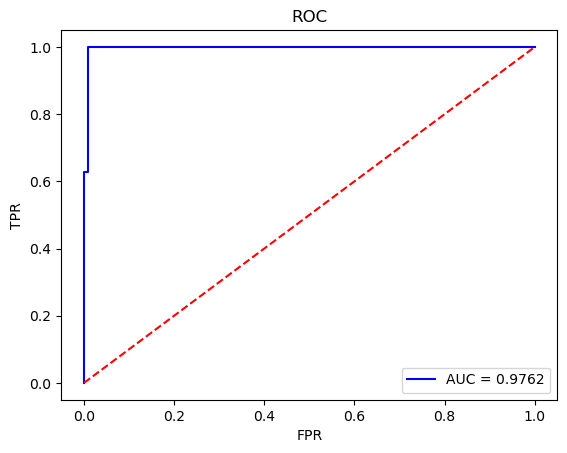

In [89]:
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f' % auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

## **模型保存与加载**
用上面逻辑回归的模型示范

In [90]:
import joblib

# 保存
joblib.dump(estimator, './output/my_ridge.pkl')

['./output/my_ridge.pkl']

In [91]:
# 加载
estimator = joblib.load('./output/my_ridge.pkl')

## **无监督学习算法 K-means**
链接：[SHOWMEAI 聚类算法](https://www.showmeai.tech/tutorials/34?articleId=197)

In [92]:
# 直接拿上面逻辑回归代码中的 x 当做没标签的数据集
data = x

In [93]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=3)
estimator.fit(data)
y_predict = estimator.predict(data)
y_predict[:50]  # 前50个

c:\Users\wanqi\anaconda3\envs\tensorflow-py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\wanqi\anaconda3\envs\tensorflow-py38\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0,
       2, 0, 0, 2, 2, 0])

In [94]:
# 模型评估：使用轮廓系数 silhouette_score
from sklearn.metrics import silhouette_score

silhouette_score(X=data, labels=y_predict)

0.5245427800706391